## Before and After Image Preprocessing

This notebook has example Matplotlib calls to visualize preprocessing functions.

In [1]:
import os
import imageio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import sys

# Path hack to access modules from root directory
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(root_dir)

from src.data_io import ImageData


### Load image data

Load the image data (B, H, W, C) below.

In [2]:
image_data = np.load('../spot_data/SpotNet-v1_1/test.npz', allow_pickle=True)['X']

### Insert preprocessing functions

Copy the preprocessing function you want to use below.

In [3]:
## Example
def preprocess_images(images: ImageData) -> ImageData:
    ksize = 3  # Kernel size for the median blur
    raw_images = images.to_numpy().raw
    preprocessed_images = np.zeros_like(raw_images)

    # Apply Median Blur individually to each image in the raw data batch.
    for i in range(images.batch_size):
        for c in range(raw_images.shape[3]):  # Apply to each channel
            preprocessed_images[i, :, :, c] = cv.medianBlur(raw_images[i, :, :, c], ksize)

    images.raw = preprocessed_images
    return images

### Visualize original and preprocessed images

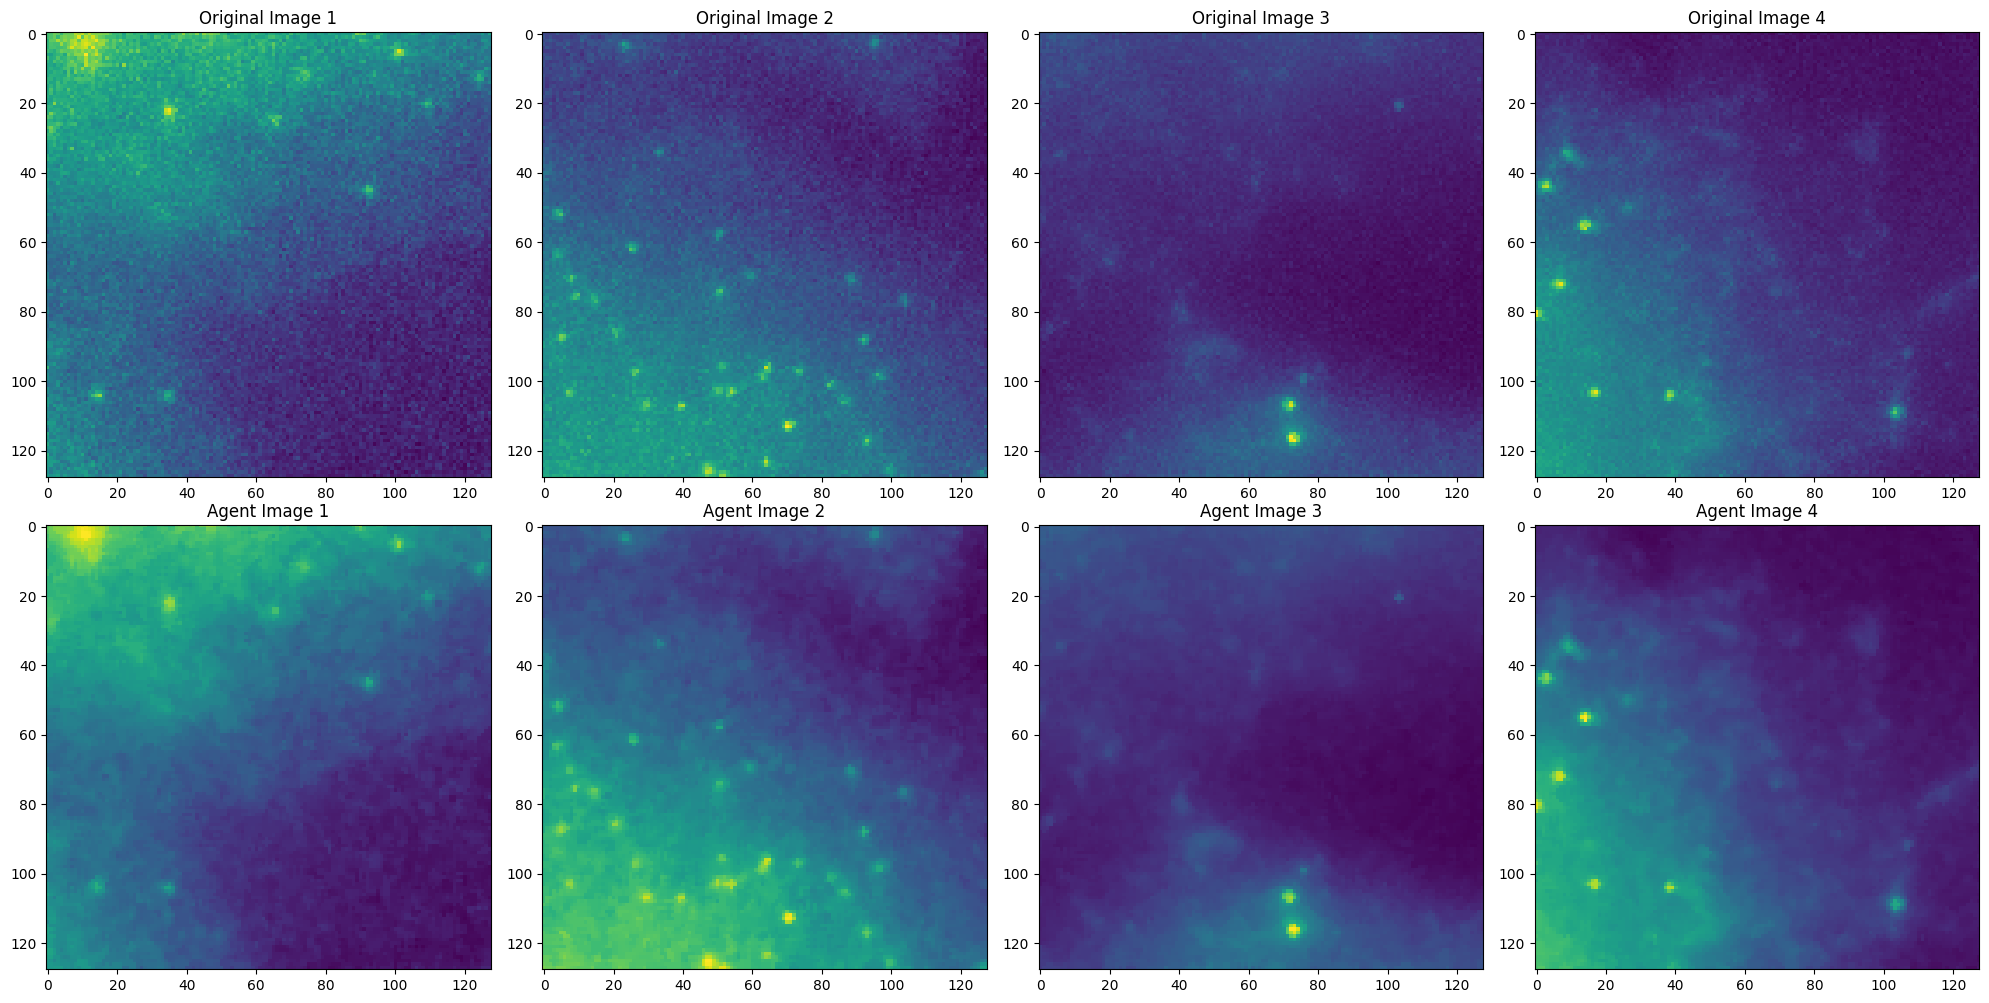

In [4]:
orig_images = np.array(image_data)
orig_images_copy = np.array(image_data)
agent_images = preprocess_images(ImageData(image_data)).to_numpy().raw
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i in range(4):
    axes[0, i].imshow(orig_images[i, ..., 0], cmap='viridis')
    axes[0, i].set_title(f'Original Image {i+1}')
    axes[1, i].imshow(agent_images[i, ..., 0], cmap='viridis')
    axes[1, i].set_title(f'Agent Image {i+1}')
plt.tight_layout()